# Pandas Basics

## Timeline
- 2008: Development of pandas started in [AQR Capital Management](https://www.aqr.com/)
- 2009: pandas becomes open source
- 2012: First edition of Python for Data Analysis is published
- 2015: pandas becomes a NumFOCUS sponsored project
- 2018: First in-person core developer sprint

More about pandas <https://pandas.pydata.org/about/index.html>



### Step 1. Import the necessary libraries

If you don't have already, make a new virtual environment:

```shell
pyenv virtualenv 3.13.5 cs181
```

Then activate the virtual environment:
```shell
pyenv activate cs181
```

Now start managing this virtual environment with poetry
```shell
poetry init
```

Now add **pandas** to dependencies.

Run this in the terminal:
```shell
poetry add pandas
poetry add matplotlib
poetry add seaborn
```

Which will do **pip install pandas** in the activated virtual environment.


Then choose  the virtual environment with the dependencies:

![](./img/6.1-pandas/virtual-environment.png)

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

### Step 3. Assign it to a variable called users and use the 'user_id' as index

In [104]:
users = pd.read_csv(
    "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",
    sep="|",
    index_col="user_id",
)
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


### Step 4. See the first 25 entries
Solve it by 2 different ways

In [7]:
users.head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [11]:
users.iloc[0:25]

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


### Step 5. See the last 10 entries

In [13]:
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


In [12]:
users.iloc[-10:]

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


### Step 6. What is the number of observations in the dataset?
Solve it by 2 different ways

In [17]:
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [16]:
users.shape[0]

(943, 4)

In [22]:
len(users.index.values)

943

In [20]:
type(users.index.values)

numpy.ndarray

In [15]:
len(users.index)

943

### Step 7. What is the number of columns in the dataset?
Solve it by 2 different ways

In [30]:
users.shape[1]

4

In [29]:
users.columns = ['age', 'gender', 'occupation', 'zip_code_2']
users.columns

Index(['age', 'gender', 'occupation', 'zip_code_2'], dtype='object')

In [31]:
len(users.columns)

4

### Step 8. Print the name of all the columns.

In [32]:
users.columns

Index(['age', 'gender', 'occupation', 'zip_code_2'], dtype='object')

### Step 9. How is the dataset indexed? Get the index values

In [34]:
users

,age,gender,occupation,zip_code_2
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [33]:
users.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
      dtype='int64', name='user_id', length=943)

### Step 10. What is the data type of each column?
Solve it by 2 different ways

In [40]:
users.age of person

user_id
1      24
2      53
3      23
4      24
5      33
       ..
939    26
940    32
941    20
942    48
943    22
Name: age, Length: 943, dtype: int64

In [39]:
users['age of person']

user_id
1      24
2      53
3      23
4      24
5      33
       ..
939    26
940    32
941    20
942    48
943    22
Name: age, Length: 943, dtype: int64

In [48]:
users['age'].dtype

dtype('int64')

In [49]:
users.loc[940, 'age'] = 'only 32'

/tmp/ipykernel_292126/2867950217.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'only 32' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  users.loc[940, 'age'] = 'only 32'


In [50]:
users['age'].dtype

dtype('O')

In [55]:
type(users.loc[940, 'age'])

str

In [54]:
type(users.loc[941, 'age'])

int

In [57]:
users

,age,gender,occupation,zip_code_2
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,only 32,M,administrator,02215
941,20,M,student,97229


In [56]:
for col in users.columns:
    print(col, users[col].dtype)

age object
gender object
occupation object
zip_code_2 object


### Step 11. Print only the occupation column
Solve it by 2 different ways

In [59]:
users.occupation

user_id
1         technician
2              other
3             writer
4         technician
5              other
           ...      
939          student
940    administrator
941          student
942        librarian
943          student
Name: occupation, Length: 943, dtype: object

In [60]:
users["occupation"]

user_id
1         technician
2              other
3             writer
4         technician
5              other
           ...      
939          student
940    administrator
941          student
942        librarian
943          student
Name: occupation, Length: 943, dtype: object

### Step 12. How many different occupations are in this dataset? How many users per occupation are in the dataset?

In [65]:
len(set(users['occupation']))

21

In [67]:
len(users['occupation'].unique())

21

In [68]:
len(users["occupation"].unique())

21

In [71]:
users.groupby(by="occupation").count()

,age,gender,zip_code_2
occupation,,,
administrator,79,79,79
artist,28,28,28
doctor,7,7,7
educator,95,95,95
engineer,67,67,67
entertainment,18,18,18
executive,32,32,32
healthcare,16,16,16
homemaker,7,7,7


### Step 13. What is the most frequent occupation?

In [72]:
users.groupby(by="occupation").count()

,age,gender,zip_code_2
occupation,,,
administrator,79,79,79
artist,28,28,28
doctor,7,7,7
educator,95,95,95
engineer,67,67,67
entertainment,18,18,18
executive,32,32,32
healthcare,16,16,16
homemaker,7,7,7


In [74]:
freq = users.groupby(by="occupation").count()
freq

,age,gender,zip_code_2
occupation,,,
administrator,79,79,79
artist,28,28,28
doctor,7,7,7
educator,95,95,95
engineer,67,67,67
entertainment,18,18,18
executive,32,32,32
healthcare,16,16,16
homemaker,7,7,7


In [79]:
freq.sort_values(by='age', ascending=False).iloc[0]['age']

np.int64(196)

np.int64(196)

In [90]:
condition = freq['age'] == freq.loc[:,'age'].max()
condition

occupation
administrator    False
artist           False
doctor           False
educator         False
engineer         False
entertainment    False
executive        False
healthcare       False
homemaker        False
lawyer           False
librarian        False
marketing        False
none             False
other            False
programmer       False
retired          False
salesman         False
scientist        False
student           True
technician       False
writer           False
Name: age, dtype: bool

In [94]:
# freq.iloc
# freq.loc
# freq['column']

freq[condition].index

Index(['student'], dtype='object', name='occupation')

In [97]:
freq[condition].index[0]

'student'

In [98]:
freq[freq['age'] == freq.loc[:,'age'].max()].index[0]

'student'

In [99]:
freq[freq['age'] == freq['age'].max()].index[0]

'student'

In [100]:
freq[freq['age'] == freq.age.max()].index[0]

'student'

In [84]:
freq = users.groupby(by="occupation").count()

freq[freq["age"] == freq["age"].max()].index[0]

'student'

### Step 14. Summarize the DataFrame.

In [101]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    object
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip_code_2  943 non-null    object
dtypes: object(4)
memory usage: 69.1+ KB


In [102]:
users.describe()

,age,gender,occupation,zip_code_2
count,943,943,943,943
unique,62,2,21,795
top,30,M,student,55414
freq,39,670,196,9


### Step 15. What is the mean age of users?

In [105]:
users.age.mean()

np.float64(34.05196182396607)

### Step 16. What is the age with least occurrence?

In [106]:
age = users.groupby(by="age").count()

age

,gender,occupation,zip_code
age,,,
7,1,1,1
10,1,1,1
11,1,1,1
13,5,5,5
14,3,3,3
...,...,...,...
66,1,1,1
68,2,2,2
69,2,2,2


In [107]:
age[age["gender"] == 1].index.to_list()

[7, 10, 11, 66, 73]

### How many people there are in each occupation ?

In [108]:
df = users.copy()

In [ ]:
from matplotlib import pyplot as plt

In [114]:
import matplotlib.pyplot as plt

In [110]:
# Count number of people per occupation
occupation_counts = df["occupation"].value_counts()
occupation_counts

occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: count, dtype: int64

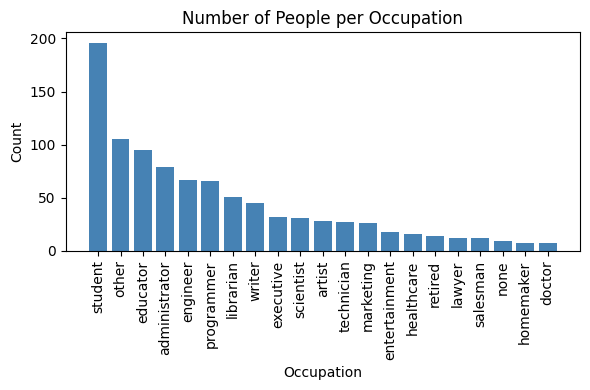

In [121]:
# Plot
plt.figure(figsize=(6, 4))
plt.bar(occupation_counts.index, occupation_counts.values, color="steelblue")
plt.title("Number of People per Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

What issues we encounter with the following graph ?

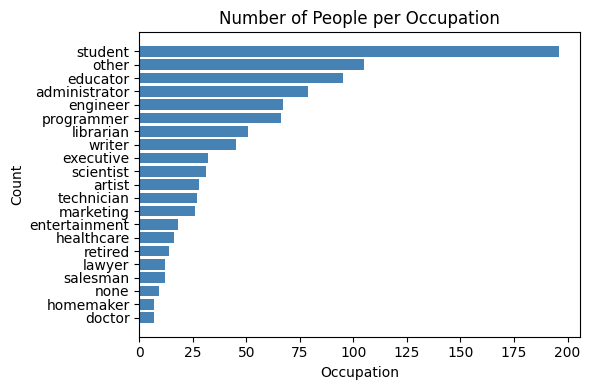

In [122]:
occupation_counts2 = occupation_counts.sort_values(ascending=True)
plt.figure(figsize=(6, 4))
plt.barh(occupation_counts2.index, occupation_counts2.values, color="steelblue")
plt.title("Number of People per Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='occupation'>

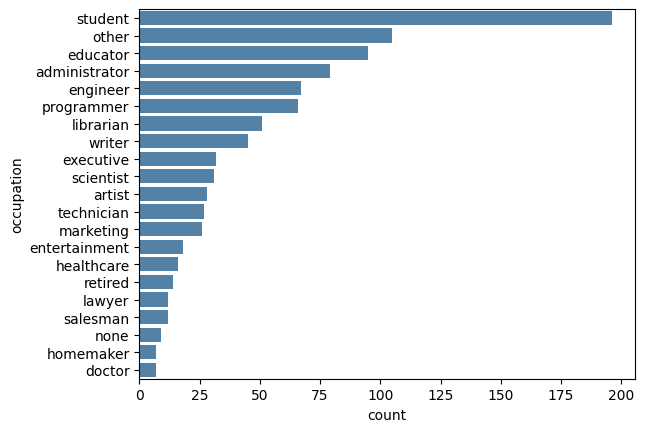

In [123]:
import seaborn as sns

sns.countplot(
    data=df,
    y="occupation",
    color="steelblue",
    order=df["occupation"].value_counts().index,
)
